# 2D Coordinate transformation

## Example 3: 2DOF robot arm - Forward kinematics  

In [1]:
from matplotlib import pyplot as plt
from numpy.linalg import inv
from IPython import display
import numpy as np
import math

PI = 3.1415926535

def plot3x3Mat(m):
    print("[%6.2f\t%6.2f\t%6.2f]"%(m[0,0],m[0,1],m[0,2]))
    print("[%6.2f\t%6.2f\t%6.2f]"%(m[1,0],m[1,1],m[1,2]))
    print("[%6.2f\t%6.2f\t%6.2f]"%(m[2,0],m[2,1],m[2,2]))
    
def IIDrotM(phi):
    m = np.array([[math.cos(float(phi)),math.sin(float(phi)),0],[-math.sin(float(phi)),math.cos(float(phi)),0],[0,0,1]])
    return m

def IIDtraM(v):
    m = np.array([[1,0,float(v[0])],[0,1,float(v[1])],[0,0,1]])
    return m

def IIDtraHTMvec(x,y):
    v = np.array([ [float(x)],[float(y)],[1] ])
    return v

In [2]:
def createPlot(fig, base, j0, j1, tcp):
    plt.xlim(-6, 6)
    plt.ylim(-4, 8)
    x = [base[0,2], j0[0,2], j1[0,2], tcp[0,2]]
    y = [base[1,2], j0[1,2], j1[1,2], tcp[1,2]]
    fig.scatter(  j0[0,2] ,j0[1,2], s = 20 )
    fig.scatter(  j1[0,2], j1[1,2], s = 20 )
    fig.scatter( tcp[0,2],tcp[1,2], s = 20 )
    fig.plot(x,y);
    return

### (I) Scenario

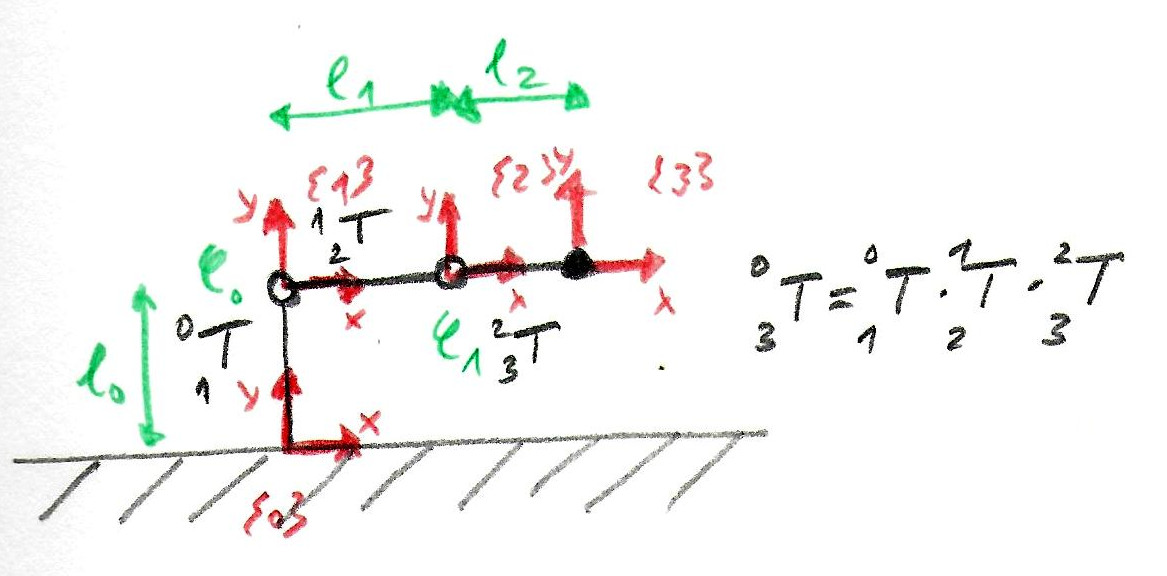

In [3]:
# definition of parameters of the kinematic chain
l0 = 3
l1 = 3
l2 = 2
phi0 = 0
phi1 = 0

### (II) Derive the three HTMs  $~~~^{0}_{1}T~~~$, $~~~^{1}_{2}T~~~$ and $~~~^{2}_{3}T~~~$ 

#### (II).a  HTM $~~~^{0}_{1}T~~~$

In [4]:
TR_1_0 = IIDtraM(IIDtraHTMvec(0,l0))
R_1_0  = IIDrotM(-phi0)

T_1_0 = TR_1_0 @ R_1_0

In [5]:
#Output final matrix T_1_0
plot3x3Mat(T_1_0)

[  1.00	  0.00	  0.00]
[  0.00	  1.00	  3.00]
[  0.00	  0.00	  1.00]


#### (II).b  HTM $~~~^{1}_{2}T~~~$

In [6]:
TR_2_1 = IIDtraM(IIDtraHTMvec(l1,0))
R_2_1  = IIDrotM(-phi1)

T_2_1 = TR_2_1 @ R_2_1

In [7]:
#Output final matrix T_2_1
plot3x3Mat(T_2_1)

[  1.00	  0.00	  3.00]
[  0.00	  1.00	  0.00]
[  0.00	  0.00	  1.00]


#### (II).c  HTM $~~~^{2}_{3}T~~~$

In [8]:
TR_3_2 = IIDtraM(IIDtraHTMvec(l2,0))
R_3_2  = IIDrotM(0)

T_3_2 = TR_3_2 @ R_3_2

In [9]:
#Output final matrix T_2_1
plot3x3Mat(T_3_2)

[  1.00	  0.00	  2.00]
[  0.00	  1.00	  0.00]
[  0.00	  0.00	  1.00]


### (III) Define a function for the final parameterized HTM $~~~^{0}_{3}T(\phi_0, \phi_1, ...)~~~$

In [10]:
def FK(PHI0,PHI1, L0,L1,L2):
    htm_1_0 = IIDtraM(IIDtraHTMvec(0,L0)) @ IIDrotM(-PHI0)
    htm_2_1 = IIDtraM(IIDtraHTMvec(L1,0)) @ IIDrotM(-PHI1)
    htm_3_2 = IIDtraM(IIDtraHTMvec(L2,0)) @ IIDrotM(0)
    htm_3_0 = htm_1_0 @ htm_2_1 @ htm_3_2
    return htm_3_0

def FK_TCP(PHI0,PHI1, L0,L1,L2):
    return (FK(PHI0,PHI1, L0,L1,L2)) 

def FK_J1(PHI0,L0,L1):
    htm_1_0 = IIDtraM(IIDtraHTMvec(0,L0)) @ IIDrotM(-PHI0)
    htm_2_1 = IIDtraM(IIDtraHTMvec(L1,0))
    htm_2_0 = htm_1_0 @ htm_2_1
    return htm_2_0

def FK_J0(L0):
    htm_1_0 = IIDtraM(IIDtraHTMvec(0,L0))
    return htm_1_0

def FK_BASE():
    I = np.array([[1.0,0.0,0.0,0.0],[0.0,1.0,0.0,0.0],[0.0,0.0,1.0,0.0],[0.0,0.0,0.0,1.0]])
    return I

### (VI) Calculate position of the TCP for  given joint positions $\phi_0$ and $\phi_1$

In [11]:
phi0 = PI/3
phi1 = PI/4

In [12]:
TCP = FK(phi0, phi1,l0,l1,l2)

In [13]:
plot3x3Mat(TCP)

[ -0.26	 -0.97	  0.98]
[  0.97	 -0.26	  7.53]
[  0.00	  0.00	  1.00]


In [14]:
print("x_TCP = ",end=""); print("%6.2f"%TCP[0,2])
print("y_TCP = ",end=""); print("%6.2f"%TCP[1,2])

x_TCP =   0.98
y_TCP =   7.53


### (V) Check for plausibility

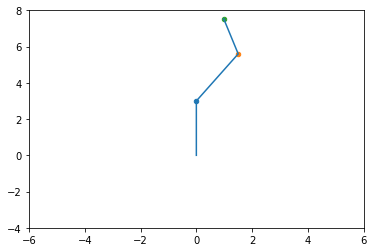

In [15]:
createPlot(plt,FK_BASE(),FK_J0(l0),FK_J1(phi0,l0,l1),FK_TCP(phi0,phi1,l0,l1,l2))
plt.show()

The result seems plausible because *\<PUT YOUR ANSWER HERE...\>*